# Arabic dialect identification
## The first step: Prepare the training and testng data
#### Auther: Rawan Hahi

In [33]:
import matplotlib.pyplot as plt
import pandas as pd 

In [21]:
train_data_path = './data/DA_train_labeled.tsv'
test_data_path = './data/DA_dev_labeled.tsv'

### Load the data from the file

In [64]:
train_data = pd.read_csv(train_data_path, sep='\t')
test_data = pd.read_csv(test_data_path, sep='\t')
train_data.head()

,#1_tweetid,#2_tweet,#3_country_label,#4_province_label
0,TRAIN_0,حاجة حلوة اكيد,Egypt,eg_Faiyum
1,TRAIN_1,عم بشتغلوا للشعب الاميركي اما نحن يكذبوا ويغشو...,Iraq,iq_Dihok
2,TRAIN_2,ابشر طال عمرك,Saudi_Arabia,sa_Ha'il
3,TRAIN_3,منطق 2017: أنا والغريب علي إبن عمي وأنا والغري...,Mauritania,mr_Nouakchott
4,TRAIN_4,شهرين وتروح والباقي غير صيف ملينا,Algeria,dz_El-Oued


### Delete province_labels  because we will work on the country level

In [65]:
del train_data['#4_province_label']
del test_data['#4_province_label']

train_data.rename(columns={'#1_tweetid': 'tweetid', '#2_tweet': 'tweet', '#3_country_label' : 'dialect'}, inplace=True)
test_data.rename(columns={'#1_tweetid': 'tweetid', '#2_tweet': 'tweet', '#3_country_label' : 'dialect'}, inplace=True)


### Display tweets ferquency for every country

<AxesSubplot:>

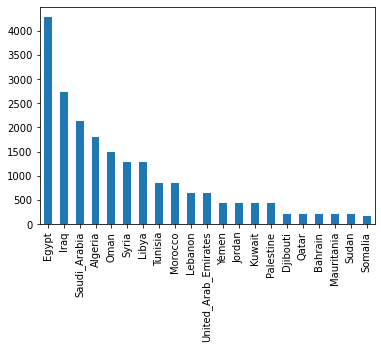

In [66]:
fig, ax = plt.subplots()
train_data['dialect'].value_counts().plot(ax=ax, kind='bar')

In [67]:
train_data['dialect'].describe()

count     21000
unique       21
top       Egypt
freq       4283
Name: dialect, dtype: object

In [68]:
train_data['dialect'].unique()

array(['Egypt', 'Iraq', 'Saudi_Arabia', 'Mauritania', 'Algeria', 'Syria',
       'Oman', 'Tunisia', 'Lebanon', 'Morocco', 'Djibouti',
       'United_Arab_Emirates', 'Kuwait', 'Libya', 'Bahrain', 'Qatar',
       'Yemen', 'Palestine', 'Jordan', 'Somalia', 'Sudan'], dtype=object)

## Data preproccessing

In [69]:
train_data=train_data.drop_duplicates(['tweetid'])
train_data=train_data.drop([train_data.columns[0]],axis=1)
train_data=train_data.reset_index(drop=True)

test_data=test_data.drop_duplicates(['tweetid'])
test_data=test_data.drop([test_data.columns[0]],axis=1)
test_data=test_data.reset_index(drop=True)



In [70]:
train_data=train_data.dropna()

test_data=test_data.dropna()


## Cleaning

In [71]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0010FFFF"  # wider range
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def clean_tweet(tweet):
  pat1 = '@[^ ]+' # Remove mentions
  pat2 = '#'      # Remove hashtags
  pat3 = '[0-9]'  #remove Number
  pat4 = '[A-Za-z]' #remove english charctares
  combined_pat = '|'.join((pat1, pat2, pat3, pat4))
  tweet = re.sub(combined_pat, '', tweet)
  tweet = re.sub('[ى]', 'ي', tweet)
  tweet = re.sub('[إأٱآا]', 'ا', tweet)
  tweet = re.sub('[ؤئ]', 'ء', tweet)
  tweet = re.sub('[ة]', 'ه', tweet)
  tweet = re.sub('[\n]', ' ', tweet)
  tweet = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), '', tweet)  # remove punctuation
  tweet=re.sub(r'(.)\1+', r'\1', tweet) # remove repeated char like هههه  
  tweet=re.sub('١|٠|٢|٣|٤|٥|٦|٧|٨|٩', '', tweet)  # remove hindi numbers

  tweet=remove_emoji(tweet)
  
  return tweet

In [73]:
clean_train_data=train_data.copy()
for i in range(len(clean_train_data)):
  try:
    tweet=train_data['tweet'][i]
    tweet=clean_tweet(tweet)
    clean_train_data['tweet'][i]=tweet
    if i%1000==0:
      print(i)
  except:
    print(tweet)

حاجة حلوة اكيد
عم بشتغلوا للشعب الاميركي اما نحن يكذبوا ويغشوا ويسرقوا ويقتلو شعوبهم ويعملوا لصالح اعدائهم
ابشر طال عمرك
منطق 2017: أنا والغريب علي إبن عمي وأنا والغريب وإبن عمي علي أخويا. #قطع_العلاقات_مع_قطر #موريتانيا_مع_قطر
شهرين وتروح والباقي غير صيف ملينا
يابنتى والله ما حد متغاظ ولا مفروس منك ولا بيحسدك انتى عره اساسا.
نفس الوقت بأكد على صاحبتي ان اي هدف هتحطه وتخططله هيبوظ والأفضل التشاؤم واننا نتوقع الأسوء دايما والفشل عشان منعشمش نفسنا ع الفاضي
م تبطلي خرا بقا علشان مطلعهوش عليكي احترمي نفسك URL  …
ما يله دخل !
هو حلو بس يتخربط ع طلاب المدراس ليك مايغيرونه عدنا
أي عرفتو، ماعندوش مصداقية بصراحة
بتتذكري مسلسل نورا هيك بتذكر كان اسمها في
أحمد ربي ديجا كي يجي واحد منهم في الوقت
يسطا لازم قريب خد بالك
نزعل و الله لو تريكه مرضش
فخري وتاج راسي هالنونا والله URL 
مال صور ' تاريخ ١٨-١٩ /٧ . URL 
فورنو كهرباء نوع كوبر نضيف بسعر مغري وممتاز El Oued إعلانات مبوبة في الجزائر | Ssoug  URL …
لا حبيتي اني مااسمع صوات حمير هنق هنق
بدو يحشر حالو بين كنادر البنات ، فعلا نظرو واطي هالشخص URL  …


اول مرة احط هيدر او عرض لميسي ؛ كانت بعد مباراة الباراغواي و واضح من هو وجه السعد
واش راك تحس دوكا بعد 10 سنين من الواقعة
هسه باجر خميس غير ؟
شلون تفوز بالابطال و انت مدربك فالفيردي
قول تانكس اليسا
حقعد اعيط عليه لييه طيب؟
حلو توصل لهدفك بطريقه غير مباشره وتتنفذ للعلم فقط انا لين أسوي اعمال وأنتج فقط لأن أنا أبيه بيدي…  URL 
ارابط عنده مرابطه  URL  …
وي يقولي وانا مالي
انتي اللطافة كلها
' ' ' الشوق دلة والمواصيل فنجال يا راعي الفنجال بالله صبه URL 
كيف صرتي تقوين الهجر وانتي كنتي من منامي تزعلين .
ربنا يحفظهم و يفرحك فيهم
دواااااام و الدوااام لله ( USER  كافيه | Barn Caffe)   URL  
كيف تغلبت ع علاقة حب فشلت تماما وانتهت بخذلان ؟ — حاجه فاشله فسهل انك تتغلب عليها مش ناقصه بقى وجع دماغ واحنا دماغنا واجعنا لوحدنا URL  …
تفرجو يا متاع ملغاة و blanc و رويق...  URL 
بكرة ايامك تجيبك .
حظكم هازارد مايلعبش اليوم بس والله الريال المباراة لهم
#وساعات_بحس أن الدنيا عماله تعلم فيا حاجات وأنا غبي مش بفهم :( .
حجاب و Cutting ازاي يا فاجره
*مفيش حـد هيشيل همڪ .. ڪلهم ۶ـندهم فضول يـ۶ـرفوه بس.*؛
احنا ا

ما أنا قررت ابقىء اديجى و ميهمنيش حاجة خالص
المكسيك خاسرة تلاثة في ماتش على الترشح ... لازمها تروح تطيح قدر وعدم جدية هذا هههههههه
انا و زميلي حمله ضد الفلاحين خد بالك URL  …
مداومه عليه فطرياً بدون معرفه التفاصيل الجميله هذي اللهُم يامُقلب القلوب ثبت قلبي على دينك . URL  …
 USER  لليه بتقولها باي كنت امشي بدون الباي
الله كريم سبحانه هذا احنا ندور والامل بالله على فكره انا كنت موظفه قبل شهرين راتبي٧ونص وطلعتني بعذر((انا عرفت ع كل شي بسرعه))
مافهمتش شن رابط بين يا بفكر يا بحس شكلها أعمق من أني نفهمها  URL  …
ها هيج دكولون حتى انتو ضدي على نوم
اكيد هههههه ترا اليد اليمنى للفون واليسرى للسكان
تابعن اتابعك تلغي الغي سالفة انا الهامور يتابعوني ولا اتابع مي بعند... - عزالله انك صادتز  URL 
راح احظركم انتي وملاك
ايه اكيد عنا ملاعب فيرست كلاس لكااا
حقيقي الي عاوز هيقدر .
هو دا نفس الي حصلي وانت بتخرم العسليه في الطريق الي ايلات ;)
انا ك مواطنة أُطالب بزيادة عدد السرافيس والباصات لأن الوضع صعب ما بالخيّال.
يا و قودوو. كي نتو. كي الشرعية الثورية تاعكم موتوو يحرق الراصاا تاعكم
انا احس بأملي بالحي

بسيطه ان شاءالله ههههههه
وقعت م الجوع ومن الراحة البقرة السمراء النطاحة.
كل عام وانت بخير بروو ، عسى عامك سعيد يارب
هاي نهاية الجهل و الفقر يا يأذي نفسه أو يأذي غيره و لانه جبان ما يكدر يأذي نفسه
طبعا انا مينفعش اقول خدوا ايه.. URL  …
الموضوع أشبه بسرقة سيارة مدير إدارة مكافحة سرقة السيارات .. مسخرة السنين بجد .
صباحِي انت .. وماغيرك يحّلي الصُبح بعُيونيِ ! #صباح #الحبء
اشاوا هاد القلاوي  URL 
ماهو اكيد ربنا هيراضي قلبي ان شاء الله يعني.
يا نحنا المنسيين URL  …
ذي منجد الي يقال لها مع الخيل ي شقرا
شكلي مال وحده عدهه فلوس وتعزم عالم ؟
احنا بلهجتنا كذا نكتبها
١٩٩٨/٤/٤ - ٢٠١٩/٤/٤ العيد ال٢١ لرهبنة أبينا الطوباوي نيافة الأنبا إسحق أسقف طما وتوابعها كل سنة ونيافتك طيب يا سيدنا والى منتهى الأعوام   URL  …
غيبـتك ياروح روحي عذبت حالـي
افضل من الاجنحة الي عندنا كاراسكو صفقة قوية لو حصلت
ياااه لو دماغي تهدى كدا وأنام من غير كوابيس ياااه
ربي يغفرلك سخفتنا
' مدري السهر بلوى وفيه ،ابتلينا ولإ ظلام الليل وحنا هويناه. #بوح_اخر_الليل
رياض محرز فخر الجزاءر و الجاحد ماي ستهلش اي كون جزاءري تحيا بلادي ا

اخذ راحتك ماني براعي عتاب ولوم ان جيتني حياك وان غبت عذرك معك
افهم روحك معنها ضم فمك لمن حاب يسمع صوتك
تسلم يا صحب تسلم يا رجوله
زوجيه وحده تانيه
مسلسل لا تطفئ الشمس دا أحلى مسلسل أنا شوفته بجد ومهما أتفرج عليه عمري ما بزهق وبعيط فيه كمية عياط محوشاها من سنة مثلاً وبجد شكراً للي عمله ⁦⁩⁦⁩
صح لسانك يسعد مساكي
انا جاي اخد الولاد عشان نتغدي برا
 USER  24/5متى ماجا هالتاريخ
صديقي العزيز .. تحب تعيش مرتاح ،! تزوج هاذيك القحبة من وجهة نظر الكعب .
ونعم فيك يا أبو عبدالعزيز على عيني وراسي نتشرف فيك قامه إعلامية كبيرة ومؤثره
يحمل غصب عن ام اهلو يااااخ URL  …
يعني عادي تمشي وعليك جراد
شغلوا الكاميرات وشغلوا الغرامات وراح يتأدبون الجهله
#بركات_حكومه_العصابات من كثرة اخبار العاجلة و الإعتقالات الكاذبة بات دخول محكمة كالدخول إلى الجزار لشراء اللحم,تقلو مدلي 200دج viande hachée يقلك جاوك 1000دج معليش! مع علمك أنه خدعك سرقك تخلص وتخرج هناك فئة عارفة بلي إعتقال أويحي خدعة لكنه يصدق أن القايد يقوم بمحاسبه العصابه URL 
يبارك بعمرك ياا رب
 USER  وثّق حسابك علي تويتر خليني انتابعك ولا تنسى ميعادنا ديماس ا

الاختلاف حلو بردوا
ماشي اجازه هههههههههههه
مريح اووي شعور انك مش غالي عند حد ولا في حد غالي عندك ولامضطر تهتم بحد ولا في حد بيهتم بيك الوحده أجمل ي ساااده .
لا يلي بتابع تغريداتك بيعرف انك شب
خايف لاحسن نشمت لناخد زيهم بكرة
شردتي اختك يا رحاب خلاص ن مفيش فايدةة
خليكي انتي حره ، كنا هنطلع بمصلحه حلوه
لكيت روحي مسوي ريتويت بالغلط عله هاي التويته هاي شوكت غير تكليلي
نهارك مبروك خويا
أشمتسحر غدر ......... قبل ألفطور أتخون !!! URL 
 USER  النور نورك بو سليمان
سلمك خوي استمر وبالتوفيق والنجاح انشاءالله
فكك بس معانا امتحانين بكرة جاهز
يا عبيد مبس هنا مكان الأحرار و ليس عبيد العبيد ف يلا من هنا
مين شخص اللي شلت منه فلو
الصداع مداوم معي اليوم :)
ياريت يفهم التحالف بدال متمسك بشرعيه الارهابيه
 USER  مافي شي جديد حق البي بي للجلكسي
كم لي ألمح لِك أبيك بجنونك!
زين كلامه صح لوخطأ؟باجر امان لولا يعني اكو احتمالية يصير شي؟؟؟
الصور فيو اوضح بشكل عام وتعويد الشغلة مش اكثر
الرأي الصائب هو أن يستلم الرئيس المكلف لائحة أسماء من الحراك ليتم إختيار شخص من كل محافظة. هيك منيح مع العلم إنني غير متفائل.
هههههه

بغيابه روحي حيرانه
وعلى قربي ؟ مَ جبرت آحد
حتى المكان اللي تمرّه تعطيه روح .. هي غافلة بس المكان الي تمرّه منتبه
صح ننخبص بالتي سكوير اني مااعرف ليش
يارب الحب يقول لي كذا مرة
حبيبي يا شيبوب  URL 
ما شاء الله دبلتهن كنك
تووو المشكله أشياء نعرفهن ، اوين مصوره صمون هذا ويش تسموه أستغفرالله بس
ي انه في خاطري كلام !!
بصراحه الي صار مع الطيار امر طبيعي من اي عدو ان يأسر طيار حيقعد يصور معاه ويدير معاه هكي .. يعني محد توجعه السخريه الي صارت لان امر طبيعي بحجم ان هوا لو حي لازم ينجاب قبل ما يموت
زينه اسم على مسمى
والله كنت ناوية كذا برحلتي كان نفسي امرها كذا بس واحد من الحسابات استشرته ونصحني مانسويها انها متعبة اللحين جد تحسفت يوم قريت كلامك انه عادي ممتع
بريت ذمتي منها ماعليك
لقطة ابراهيم الابيض وهو بيبكي علي عَشريِ اخر الفيلم تزعل
ايمتى لح يرتاح هالبلد???
لا نووو .. صيف هذا
الله يبارك في ذريتك يابو مانع
حاسه بشعور مو حلو.
دفااااع جوي يابا وانت
"رفيقي الي بيكتب وبيسجل وبيغني وبيرسم وبيدرس كيميا وكذا شغلة تانية  USER  هي من احلى الشغلات الي كتبها وسجّلها ويقول في أحد مقاطعها: \"ولكنّي، دخيل ق

قليلة ادب ؟ طيب كثريه
ادب متنعشله من دراسه انتي
مقابلة اعياد بيروت ي ٢٠١٣ بظن
شكون حاب يخدم عند ملكة بريطانيا URL  …
معاش عندي نياط لشي .
وش بيك تضحك اخاليا
اسمحولي ابريك داون فالبريك بتاعي
خليني على بالك من يجيك الليل واذكرني بحلم من تغمض عيونك فراك الناس دمعةوفركتك دمعات وعمت عين النهار اليمرمن دونك
هام جداً الموعد النهائي غدا ً!!! كلّ شيء إبتداء من الإعلان عمي ترة سويتوها ماصخة دمرتونة ماكو هيجي بطة تلعب شناو...  URL 
العلم ما كان حاكمو شي عن يدخل في أذهان التلاميذ URL 
لا تكرهني ولا تحبني ركز بحياتك وكل تبن
لانقاني في قبل اجنيه مدار ضروري جدا الله ايربحك
 USER  تقصد 2/2 بالسان سيرو 2/0 ابملعبكم ههههههههه
 USER   USER  اللحظه الي بفضحكو فيها
الله يجزاك خير '
المؤتمر قوي جدا والاعلانات اللي فيه رهيبة وفعلا انصدمت من حصرية تومب رايدر، والعاب الاندي جميلة جداً... بانتظار سوني #جيمزكوم2014
هههههه هيه والله انا بعد
صباح الخير مره ثانيه. تهزأنا اليوم ف الmorning meeting و نحن ما يخصنا. URL 
خليتينا ناخذ عليج نظرة انسانة بلا قلب
خلي أعطيك مثال عن لا للطائفية و أنت فكري جيدا إلى أين ستأخذنا

اني بالعكس عندي اغاني خاصه مالمطر اعلكهن واستمع واستانس هيج اروح بغير عالم
شحال كان في عمرك كي عرفت adidas تعني all days i dream about sport
استنى هبعتلك اللينك حقه
يعني نحجي على المكشوف هههههه
ههههه بس اتذكرت انو الصيفي بدا وبروحش
"انا اذا شميت ريحة القهوة والعوده مع بعض يرتفع عندي هرمون السعادة تلقائيآ \"̮. URL "
مش بأيدي والله يا اوس انا مظروف بلوك مدوخني  URL  …
متوتر ما عم نام الليل يازلميبدي اعرف وين اقعد
لسه مخلصتش مذاكره اخر باب وحاسه انه لسه بدري URL  …
باين انه من منظمة العداله هههههه كم مرتزق واقفين ومن اشكالهم معروفين من وين مشكله اذا تكذب وتصدق الكذبه خخخ
طيب خلاص يا الفلاوي انت
هتشتغينا يا ندا
عمري مااحب غير الاهلي ولا حد غيره يفرحني #ادعم_الاهلي URL 
ربي يبارك بعمرك ويحفظك وردة
معاد به الرجال وش ذا الجنز
مساء الورد ..... بشرنا الله يبشرك
رحت تلعب اوبعدك
#لو_نبطل نحبهم هيحبونا أكتر ؛)
ايرفينق رجعتله الاصابه
والرجالة ينصدمو ولل يحتفلو زادهوما؟ مجرد سؤال
صليحة .. دار الفلك من بعد طول العشرة URL  …
اه تصدقي ممكن فعلا بس ما اخدتش بالي قبل كده رغم اني ادعي اني باهتم باستطعام ا

ههينك لما تيجي
و انا كمان يا ماي لڤلى سيسترر
أختج كاتبة ، وانتي م تعرفي تتكلمي عربي فضيحة !
شفت كيف الصدف
حسبنا الله فيكم انتم ايش من أودم بطلو صرتو عار علئ الامه
مش عايزة اسيب البيت وأرجع تاني المنيااااااااع
اتوقع هذا چطل يضربون بي حجر ! شايف المنجنيق ؟ بس اكيد خطأ وما نقبل يضربون القوات
هاآك جديد #شوک أتهلاا Abonnés سير لاشااان Pila DZ دمتم  URL 
الستر ...دة نعمة كبيرة أوى من عند ربنا
خلااص خلينااا حلووين مع بعض
احباب الملكة يلاا مع بعض لنعيش الاجواء الرومنسية واحلى انبساط كلنا مشاهدة جماعية #ملكه_سبأ #كنزة_مرسلي #تلك_الايام #KenzaMorsli يلااا ولعت  URL 
 USER  امفل ، وامورد ، ويان امكادي ؟؟
اليوم الي افصخ فيه عبايتي بالجامعه هو اليوم الي أكون مبسوطه اني مداومه
نرومالمو دخلوه لهوليوود مخلوق هذا  URL  …
كل شيء زفت بس مسويه نفسي مستانسه.
انت حبيبي انت فاهم بس لازم تشوفلك فريق تاني تشجعه بدل الجرابيع دول
المعونة بتاعة دولة الجيش الشقيقة URL 
مو هو هذا نفسه اللي تسموه جدار برلين
يقولوا بيتوقف موسم 2020 - 2021
امشي من وجهي
عائلة اللبن يا صاحبي .. اجدع نااس ولله
تفو ما اوقحو URL  …
اصلي ها

صحا عيدكم و كل عام و نتوما بالف خير :* :*
يااانه السيل دخل علينا البيت قدحن ذولا نتقهوى ع جاله في الصاله
حتى ربطة الخبز اقتنعت انو الخبز بينصح ، و بلشت تعمل ريجيم ربطة خبز منزوعة الخبز
صحيح هذا ابن ضاحي خرفان بس لكن ابوه كوهين
كل سنه وانتي طيبه يا باشا مهندسة مريم الله يرزقك طيلة العمر وحسن العمل
هةمو. بياويك يان هةمو ئافرةتيك. وةك يةك نين
يبوي من يتمشى فيها نهار الحين والله ينصلخ جلده وعاد رطوبه
طبعاً من كتر الحرجات
زين يوم حصلت دور غيرك ما محصل
بصحتك انت كدلك اختي URL 
 USER  مؤنس ليش الريال يريد الاستغناء عن لوكا مودرتش ؟ لو هي عملية تصفية لاصدقاء المو !!
عندي احساس ان سانتا هيطلب مني ريكوايرمنت ليله رأس السنه
هاي نهايتج يم اللسان URL 
اليوم بس نبي انتفرج ع البرنامج #مجموعه_إنسان
 USER  بالعافية واحشنا والله :)
يب واكيد راح يشوفه ويفرح وانتِ افرحي
ايه دا ف ايه والله انا خفت  URL  …
اليمنيين مساكن الحرب وزيدلهم ماجر URL 
هههههه هذوك فوق القانون لتقريه
#ترامب عينة على نفط العراق #العراقيين عيونهم على ايفانكا شتحطلها حتى تطيب ؟
وبعدين بقى امسح التويته طيب
#الاتحاد_الفتح للأسف هذا مو لا

احلى خبر لو يستقيل الليىة
ابوتريكه عمال يرد ع ناس كلها معدا انتي يا مااي علشاان نكره ...بس ياا علي  URL 
ان شاء الله انت وياهم بنفس الحبال
مـــالعنوان تفهم كل شيء، حبيت نوصل ميساج بطريقة مضحكة   URL     URL 
يلي يزعل يتفلق في حد يزعل منك ومن أخلاقك الراقية
قه ده ر وابو
حط درك فيديو بلاك راهو فدزاير
باطل ههههه مافي شهود ولا امر من ولي الامر
نكتىة على الهامش || ميسي هو اللاعب الوحيد الذي عدد كراته الذهبية اكتر من عدد اهدافه في كأس العالم :D
مشكلة ما الي عين رد هون
نفسي أكتب منشور ، يقع السقف من قوة طلقاتي ولسع كلماتي بس خجلانة من بعض الأصدقاء الي عندي #ما_هذا_يا_قبيلة_المليون #يوم_أسود_في_تاريخكم
 USER  هو انتو كلكو كتل كده ؟؟ جاتكو كتله ف معاميعكو
خويتك تدري انك تقول استاذ اذا جلسنا مؤدبين تطلعنا بدنيه ؟
حتى انا بانتلي هكاك
تعالى خدى زبرى هيريحك
 USER  تكمل ان شاء الله فرحتنا ، جايين من المدينه بإذن الله
 USER  هيا نديروا عريضة ونبعتوها للوزارة مثلا ولا نسأل أهل الخبرة شونعمل مثلا وكيل الدولة او محامين القضايا الدولية
ياخي فما فريق وصل عمل الي عملاتوا لبرسا .... أيا رُوحُوا ااااا نبّار.

"بنت كاتبه : (البارحه في الحلم خنتك ، فعاقبت نفسي بنفسي وحرمت النوم.على نفسي) !! ^ لا حول الله ياربي ! ^ سجل عـندك نـفسيه من نوع فـاخر جدا\"\""
أنسو فاتي الله يكرمك يا حج فلفل
مصير الحي يتلاقى خُرافه هذا انا حيّ لكن ما لقيته .
يارب العاصفة تطير بيتك تجيبه جنب بيتي
ان شاء الله يارب صيف هايل ماتنساش اليورو
“ USER : ي محلاه يومي لا امتلى ب سواليفك ”
 USER  المرة هذي بعديها المرة الجاية طرد
  URL  … هادي هي الغرامة اخواني...  URL 
وراس العزوز خلك ياقض
صحابنا شوفو فيديو لي نحكي فيه حكاية  URL 
هي واضحه من الحين اصلا URL  …
قال تربيه ابو ابوك يا كلب مران يابردقان
دوووونياااااا .. الله لا يورينا الانهيار الحقيقي
 USER  بأذن الله نتأهل باجر
صحه ليك هذا ليش استغربت
كنتي قدامي فين طيب
مع العلم سرقت الفيدو ههههه
اعرف يفرق اني اسولف بعفويه
هههههههه تنجحين لتخافين اني العندي وراثه ولسه مبادي وراسب بي
مليت روحي بالمرة
ربي يجيب الخير مستقبل غامض و يبقى السؤال يطرح نفسه وين بيها
احلا صبااااح من فوق دمشق URL 
كان فين قلبي لما حبيتها مش عارف
أمسّح على شعرها لا نامت بحضني وتلعب بكفي وتتشكى .. وأنا أسمعها

انا مش فاهم
انت عمرك خد مني كلام و جلا مني ؟
الناس الكل تعرف إلي القيادات أغلبها من الجزاير ، و الناس لكل زادا تعرف إلي في الجزاير عندهم حساسية مفرطة في تقبل الحقيقة هاذي. و في اللأخر يقعد الإرهاب بلا حدود
كتير تعبوا لكتبو هالتغريدة
وفي ذكرى مشوار الحرفيين من ٣ سنين يفعلها Ahmed Sameh مرة تانية  URL  …
سارة كيف راكي ؟ ماراكيش في الساعة  URL 
كسؤتى قلبو ليه يا lala اخس عليكى
متروس ايجابيه انا
شكرا ليفربول شكرا كلوب لأنك كنت سبب في فرحة أجيال الها من شهر يناير عاملين حالهم بتابعوش رياضة وبحكو بالسياسة!!منيح شفنا فرحتهم. شُكُر وحب أبدي لميسي اللي أمتعنا الفترة هاي
عاد هذاك الشعور م ينوصف
المشكلة لو خرجت الجزاير و تأهل التونسيين...راح اموت من الجلطة
حضرتك نتخرج وممكن ننسفها ورانا طوالي
بقول معناش فلوس تقولي تدفعيلنا..ده غبي ياما ده ولا ايه URL 
كسم دا كلب
ماعدا انا وحماقي يعني!
انا ببص ع حاجات تانيه ي نور ، انت فرود !
اقروا الكومنتس يا جماعه. URL  …
بتدور ع عريس من دلوقتى
لا هو قاتل يسطا
لجنة المسابقات ما عندها احترف في عملها URL  …
نهاركم قطيفة ناعمة
قاعدة نحاول تما موضوع اوفر
اتفضل بس ما

اليوم عشت اشياء ككثثييرررهه وللحين ماجات الساعه١٢
يلي بحبني... بس فهمني على شو؟؟؟
احسن ما احضر مفاجأة منذر لاريج
اتمنى يقروها دكاترة البروب والباطني
 USER  تجربة موفقه من الشكل بس جوعتي المسلمين
أبغي سيارة مثلها
"و بالنهاية يجيك روجر يقول \"الون بيس شيء رائع\" وبس هاذا التلميح بيجلطني المحرر اذا كذا"
نجمو ندخلو ل guinness book بأكبر nappe في العالم
عااش يقلبي وانا هحقق حلمي معاك ان شاء الله
انا ما بقدر خلّي ربطة شعر عالتواليت حتى كركبا قبل ما اطلع  URL  …
طقوس ليلة الاختبار استلذ بكل لقمة وشَربة >> طيب الكتاب ها اي كتاب؟ اي اختبار؟ هوا اليوم ايش؟ يوم التبلد العالمي URL 
ماعليك منهم بس لا تمددها .. يلا انت وياها كل واحد على فراشه بسرعه ههههههههههههههههههههههههههههههههههههههههههههههههههههه #تمديد_الاجازه_للثلاثاء URL 
السلام عليكم ورحمة الله وبركاته انا مروقه في عز الظهر . مع السلامه
لا كان كدا خلاس
رجعت ليه بعد السوكسيه الاخير لألبوم تايغا
ميشكت له كويه كيان
وجودك أكتر وسائل الدنيا طمأنينة
خلينا كلنا نتوحد كرمال لبنان ونكون كلنا عفرد قلب كرمال القضية اللبنانية... #لبنان_وطني  URL 
كل تب

لألا حشومه ناري وتشوف المدام التغريده تبات فالزنقه غمااا قالك القررّّان دراسك URL 
اعرف ف كروت الافراح بيكتبوا مثلا نجل الاول الاستاذ فلان مثلا وبيكون العروسه كريمه الثاني الاستاذه واول حرفها بالانجليزي او تكتب الاسم عادي لكن كريمه الثاني تتكتب ( قلب فلان ) دي جديده دي
المجموعة بتاعتنا وحشة
وانتا طيب ي هندسه
هذا اللي مايجمع غياباته اول الترم
والله ماعندهم سالفه ، ماعاد اعرفوا يسونهاا عن وشو .
صحتين يا حاج
عندنا فتايل لسه
تعبت وانا ادور وكل تغريدة فيها هبلة احسب انا. غشاشه المفروض ذي لي عشان اعرفني
قررت نبدا نزور الفلوس نكمل ولا نحبس؟
هو فيه مثلك ياللي الحسن ظلك ،ليه العطر ؟! وانتي انفاسك دخون..وليه الكحل؟!وانتي ماغيرك عُيون ..وليه تفكيرك يكون انك تكوني دايم اجمل؟!انتي اجمل من جمالك من دلالك من خيالك..
صُوتها الوحيد اللي يحلي ليلي ):
 USER  كفو والله .. ماشاء الله
صوت الجمهور بالطريقة هاذي ماركا مسجلة خاصة بالجماهير الجزائرية
ضروري حآجه مهمه اذا يهمك ؟
بفضل سياسية فخامته ... اصبحنا dépôt تاع كوكاين ماشي بلاااااااد
هاي ضحكتي القديمة
هتقولي رابعه رمز الصمود .. هقولك خدتك في #محمد_محمود
يا

يستاهل بو محمد والف مبروك
ماعرفتني والله ،اهم شي تشبيه ساره وريم ، ساره الثانيه حبيبة قلبي  URL 
شكله يشبه الحصو عدا طعما اللي ماينحب
المشكلة اذا اللي يسولف لوح وما يفهم ، انتي تعطيه هالابتسامة وهو يستمر ف سوالفه البيض
 USER  مو مشكله بس ما شاءالله عليك ماكو شي ما تسويله رتويت
ابطال ايه ياحبيبي........ اتغطي كويس
كل ما بقدر يوم انساك برجع ادور واستناك
صبعه اللي في النص منتفخ
الصقر ربي يسلمه دار توحد لحفتر وصياعه  URL  …
يسلم قلبك.. ويخليك
طلع مؤلم اوي الحب اللي من طرف واحد ده ..وبالاخص لما الاخر تكون بلدك .....󾌴󾌴󾌴
#ماتريX_وفولورز_للسبت اي يا ملوك الفولو  URL 
 USER  راح اتواصل معاك واسلمك ياه بنفسي ولايهمك
برجولية انا عجبني و باش نصوتلو لازمك تسمعو
العقبه .. جو خرافي
لحد يكذب عليك ويقول اسوء شعور انك تخسر حبيب اصعب شعور صح انك تصحى من النوم وتلاقي شاحنك 1٪ وتفتحه ويطفي عليك ههههههههههههههههه
الكلام مابي فائدة اذا فينجر مستمر
اه طلعة بر مع الحبايب والذبيحة بالصندوق
هتلاقي عند محلات اللابات فيه حاجات كتير و موجود بوينتر و ريموت مع بعض شفته مع مدرس قبل كدة
ياااااااه مين اللي خلاكي نايمي و

In [74]:
clean_test_data=test_data.copy()
for i in range(len(clean_test_data)):
  try:
    tweet=test_data['tweet'][i]
    tweet=clean_tweet(tweet)
    clean_test_data['tweet'][i]=tweet
    if i%1000==0:
      print(i)
  except:
    print(tweet)

قولنا اون لاين لا يا علي اون لاين لا
ههههه بايخه ههههه URL  …
ربنا يخليك يا دوك ولك المثل :D
#اوامر_ملكيه ياشباب اي واحد فيكم عنده شي يذكره بالعساف يجيبه له احرقه
شد عالخط حتى هيا اكويسه
انا صاحي ميت مالضحك ايه داااااا
لا مين أنتِ؟ ههههههههههههههههههههههههههههههههههههههههههههههههههههههه .
جاي عبالي رشوف
"\"ان شاء الله تببوا إلي وإبقى إلكن كل العمر \" أمينن يارب  URL "
الله يلعنك انت اصلا مريض انتزعت من قلبك الرحه URL  …
انتوا ممكن تسامحوا حد جه عليكم اواذاكم في حاجه و لوطلب منكم السماح هتسامحوا ولا هتتجاهلوا؟؟
 USER  وياك يارب ويسعدك سعاده مالها نهاية ، يقلبي انتي .
خلاص وصلتني دي ام شكراً URL  …
وطز فيك معهم وفي شكلك يالئيم
 USER  الله يسلمك الغالي
شفت الورد وسالته عنك
صباح خير . اي سؤال احد حاب يسال يتفضل بعض اسالة حساسة ما اجيب علية . تحب حول هجرة او غير هجرة خاص او عام . هنا اكدر اجيب اقصد على الانستا كون مساحة صغيرة . والعدد قليل . مادام مزاج قابل فيا هلا  URL  …
#tellonym لا حبي ماعندي كونكتد .
عم يحضروا خليفة بوتفليقة يبدوا أن الحالة الصحية للرئيس صعبة ربنا يجيب الخير أن شاء الل

لو جفوني الناس واقرب الاهالي ماستمع قول الحسود الواشينا حيث قصرك فالحشا شامخ وعالي ساكن ودك بقلبي مستكينا
ربي يسلمك ويسعد قلبك
هيه كانو الناس في كهوف قبل عن توصل هي
محدش فينا نسي التاني بس محدش فينا هيرجع يتكلم!
اي حد مايعجبني يصير اسمه سلح الليل دايركت
 USER  ناوي عليي في السجن 🙁😂🔨
خلاص انتظر تراعشان ادعيلش
جاري تحويل مشجعي برشلونه الى مشجعي : السيتي ' اتلتيكو ' البايرن ھَھٍھَھٍ(آآآآآخّ
البوم حزين سمعت 2 بس مقدرتش قولت بعدين اكمله صعب الايام دي
الامفي ايوه بس الاغنية قد سمعتها بشكل مقطّع
بخزي لأنه مدريد مو في
در بالك لا اتعضك واتصير كلب يا نجس الباديه
اسف كوردستان مو عراق كوردستان وطن كوردى عراق جيرانا (  USER   URL  )
يلمها ربنا ياخويا محمد
#الحوت_الازرق ايش التاق الجميل ذا .
شو يعني ؟؟ خلص الدوري الانجليزي ضعيف والليجا اقوى دوري بالعالم كويس كدة
انا كسول جدا وما بحب اناقش فخلص بنظري احنا بنفهم وبنظرك انتوا بتفهموا
حلوة و كذابة
حبيبي القاسي ترا القسوة حرااام...عنجد رووووعاااتك أبدعت
انا عاوز اتكلبش ي شباب
ربنا يتممهالك بالف خير ويديم فرحتك يحبيييي
مايوناز و هريسة طبعا الهريسة ذي صلصة

بعد الطريقة.ال مشى بيها جروس انسو أي مدرب محترم يجي الزمالك روح ياشيخ منك للة
 USER  وش هالكشته نوم وأكل ما فيه رياضة أو نشاط ثقافي :)
 USER  بمر عندهم،،، شكرا جزيلا
الاسبريسو فالعالم كله صاده وماغير اي إضافات الا اذا طلبتي انتِ ، المعدله معروفه ك اسم ف ليببا بس
جميل ولد يام الليله
هذا رسم و هذك نحت هي صفقولي URL  …
من هذا بن ناصر ومسوي مسابقة؟ #مسابقة_بن_ناصر_للأطفال_بالزي_العُماني
لك يصير الي مايصير !!!
الخال والخالة رزق
كامل رانا في نفس الكفة اللهم امين
مبارك ليك ولينا اختي  USER 
الرجل باين عليه من آسيا فلا داعي لإقحام العرب في الموضوع
حالنا معكم أسمع كلامك اصدقه واشوف فعلك اتعجب
رووداوي هاتووجؤ بة وينةوة  URL 
اي كبدي اي
اعمل نفسك ميت لين يخلص اليوم
"الشعب اللي لو ابتسمت لهم قالوا \"حبّتني وتبيني\""
اه فعلا التفكير في ان الارض مسطحه وله بيضاويه صعب والتفكير في انك متصدر الدوري وهتاخد علي عينك صعب برضو
لن اعلق على التغريدة ياميقو سبحان الله تشبه اخي لدرجة كبيرة سبحان الله بس اخي اسمه محمد
خد هي زقفة ارتحت؟؟
عمي تهددين علينه شمسوين
"\"مش هتجيلي تقوليلي انا نازلة مع فلان ولا علان الك

يستمر للابد و ميتينا كOCs يطلع ... يخ هو في ال٥ ايام دي قلنا الروب
انت اجمل حاجّة بخبيها في قلبي .
اوكيدجة كاين داير لايف فتويتش
زبر احوالك توا كيف نضت جوي متنيك لزب وبنعاود نرقد
حبيبي الله يشفي يجومه بسلامه ان شاء الله
نا جربت كمون حلو طبخته وشربته يقولو يهدي الاعصاب وينعس، لي 3ساعات نرجى فيه ينعسني
هههههه هذا اصلي ومتمسك بالعادات والتقاليد
ننقنه النفسيه تبيلها فرزوغه
ما تخافش لن يقولوا لأنهم سيطمعونهم بالاتي: الانتخابات التشريعية
مسويتلك فولو يمكن
لا يجماعة انا نفهم غلط احسبوا كلامكم
وي عندك صح
اييييييي ،+ الفستان يموت
ما أظّن بعده بتَعشق العين لِسنين. .
سدس وانت صادق
خوش قرار وخوش وصف دقيق جدا
الجهاز إكس بوكس العانس مافيه محتوى يفتح العين أفضلك بجيل القادم أنك تاخذ pc أحسنلك من تدفع على لا شيئ
 USER  في فرق بين ما حاسه وبين ما مذاكره انا طبعًا الثانيه
و الله يا مروان اذا بخاف انحسد عليك حقي و الله انت بجد تجنن انت هواك محصلش على راي اصالة و اتفرج على مسلسل تركي معي هلا سواش و ياسمين بموت عليهم
لا هييجي الهم الي يبكي قريب متستعجليش
للأسف اضطريت اغير مود اليوم مو نعناع قهوة بس لا تخاف

## Remove the duplicated tweets between Training - Testing data

In [75]:
for train_tweet in clean_train_data['tweet']:
  for test_tweet in clean_test_data['tweet']:
    if train_tweet==test_tweet:
      clean_train_data=clean_train_data.drop(clean_train_data[clean_train_data['tweet']==train_tweet].index)
      print("Removed from train set : ", train_tweet)

Removed from train set :  ربي يجيب الخير
Removed from train set :  ربي يجيب الخير
Removed from train set :  يارب الله يسمع منك
Removed from train set :  اه طبعاً طبعاً
Removed from train set :  ربي يجيب الخير
Removed from train set :  الله يحفظه ويطول بعمره
Removed from train set :  الله يحفظه ويطول بعمره
Removed from train set :  الله يبارك فيكي
Removed from train set :  الله يبارك فيكي


## Save the processed data to separate file

In [76]:
clean_train_data.to_csv('Cleaned_Training_Data.csv')

In [77]:
clean_test_data.to_csv('Cleaned_Test_Data.csv')

## if you need to install the libraries

In [ ]:
!pip install farasapy
!pip install pyarabic